# Final Results plots for URSI 2022 paper
## from https://github.com/annadignan/ursi2022/blob/main/summer2022research.ipynb

In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#loading in data
info1=pd.read_csv(r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Catalog (8.26).csv")
info1=pd.DataFrame(info1)

info2=pd.read_csv(r"C:\Users\pheretz\Desktop\URSI_Internship\Sources Info Sheet - Molecular Catalog (7.28).csv")
info2=pd.DataFrame(info2)

#merge two dataframes into one
info_master=pd.merge(info1,info2,on='Star',how='outer')

#pulling in columns I want (name, star system, disk characteristics, molecular info)
info_master = pd.DataFrame(info_master, columns= ['Existing_Spitzer_data','Star','Disk_has_Rings','Disk_has_spirals','Disk_Asymmetry',
                                     'Star_system','Spectral_Type',
                                     'OH_23_2_microns','OH_23_2_microns_uncertainty','OH_27_6_microns','OH_27_6_microns_uncertainty',
                                     'HCN_flux','HCN_flux_uncertainty',
                                     'C2H2_flux','C2H2_flux_uncertainty',
                                     'H2O_15_17_microns','H2O_15_17_uncertainty',
                                     'H2O_17_22_microns','H2O_17_22_uncertainty',
                                     'H2O_29_85_microns','H2O_29_85_uncertainty',
                                     'CO2_flux','CO2_flux_uncertainty',
                                    'NeII_12_8_flux','NeII_12_8_flux_uncertainty'
                                    ])

info_master = info_master.loc[(info_master['Existing_Spitzer_data'] != 'No') & (info_master['Existing_Spitzer_data'] != 'No?')]

print(info_master)

   Existing_Spitzer_data        Star Disk_has_Rings Disk_has_spirals  \
0          Yes_published      HT Lup          FALSE             TRUE   
1          Yes_published      GW Lup           TRUE            FALSE   
2          Yes_published      IM Lup           TRUE             TRUE   
3          Yes_published      RU Lup           TRUE            FALSE   
6        Yes_unpublished      MY Lup           TRUE            FALSE   
9          Yes_published      AS 205          FALSE             TRUE   
10       Yes_unpublished        SR 4           TRUE            FALSE   
12         Yes_published     DoAr 25           TRUE            FALSE   
13       Yes_unpublished    Elias 24           TRUE            FALSE   
17         Yes_published     WaOph 6           TRUE             TRUE   
18       Yes_unpublished      AS 209           TRUE            FALSE   
19       Yes_unpublished   HD 163296           TRUE            FALSE   
20       Yes_unpublished      FZ Tau            -99             

In [2]:
###water
# Here, suppress -99 fluxes, where spectra is not available:
water = info_master.loc[(info_master['H2O_15_17_microns'] != -99)]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_water = ((water.H2O_15_17_uncertainty != -99) | (water.H2O_17_22_uncertainty != -99) | (water.H2O_29_85_uncertainty != -99))

###oh
# Here, suppress -99 fluxes, where spectra is not available:
oh = info_master.loc[(info_master['OH_23_2_microns'] != -99) | (info_master['OH_27_6_microns'] != -99) ]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_oh = ((oh.OH_23_2_microns_uncertainty != -99) | (oh.OH_27_6_microns_uncertainty != -99))

oh = oh[mybool_oh]

##hcn
# Here, suppress -99 fluxes, where spectra is not available:
hcn = info_master.loc[(info_master['HCN_flux'] != -99)]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_hcn = (hcn.HCN_flux_uncertainty != -99)

hcn = hcn[mybool_hcn]

###c2h2
# Here, suppress -99 fluxes, where spectra is not available:
c2h2 = info_master.loc[info_master['C2H2_flux'] != -99]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_c2h2 = (c2h2.C2H2_flux_uncertainty != -99)

c2h2 = c2h2[mybool_c2h2]

###co2
# Here, suppress -99 fluxes, where spectra is not available:
co2 = info_master.loc[info_master['CO2_flux'] != -99]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_co2 = (co2.CO2_flux_uncertainty != -99)

co2 = co2[mybool_co2]

###neii
# Here, suppress -99 fluxes, where spectra is not available:
neii = info_master.loc[info_master['NeII_12_8_flux'] != -99]

# State that "uncertainty does not = -99" indicates a "TRUE" detection:
mybool_neii = (neii.NeII_12_8_flux_uncertainty != -99)

neii = neii[mybool_neii]

neii[neii['Disk_Asymmetry'] == 'TRUE']

,Existing_Spitzer_data,Star,Disk_has_Rings,Disk_has_spirals,Disk_Asymmetry,Star_system,Spectral_Type,OH_23_2_microns,OH_23_2_microns_uncertainty,OH_27_6_microns,...,H2O_15_17_microns,H2O_15_17_uncertainty,H2O_17_22_microns,H2O_17_22_uncertainty,H2O_29_85_microns,H2O_29_85_uncertainty,CO2_flux,CO2_flux_uncertainty,NeII_12_8_flux,NeII_12_8_flux_uncertainty


[ 66.66666667 100.          66.66666667  33.33333333  66.66666667
   0.        ]


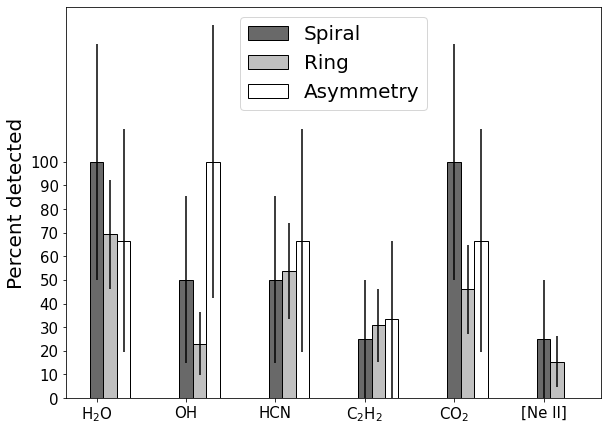

In [9]:
#stacked bar chart

#import statement
from matplotlib import ticker

#create blank figure
plt.figure(figsize=(9.6,7.2))

#spiral data
spiral1= len(water[water['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral2= len(oh[oh['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral3= len(hcn[hcn['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral4= len(c2h2[c2h2['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral5= len(co2[co2['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))
spiral6= len(neii[neii['Disk_has_spirals'] == 'TRUE']) / (len(info_master[info_master['Disk_has_spirals'] == 'TRUE']))

#error bars for spiral data
spiralerr1= np.sqrt(spiral1/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr2= np.sqrt(spiral2/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr3= np.sqrt(spiral3/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr4= np.sqrt(spiral4/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr5= np.sqrt(spiral5/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))
spiralerr6= np.sqrt(spiral6/(len(info_master[info_master['Disk_has_spirals'] == 'TRUE'])))

spiral = 100*np.array((spiral1,spiral2,spiral3,spiral4,spiral5,spiral6))
spiralerr = 100*np.array((spiralerr1,spiralerr2,spiralerr3,spiralerr4,spiralerr5,spiralerr6))

#ring data
ring1= len(water[water['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring2= len(oh[oh['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring3= len(hcn[hcn['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring4= len(c2h2[c2h2['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring5= len(co2[co2['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
ring6= len(neii[neii['Disk_has_Rings'] == 'TRUE']) / (len(info_master[info_master['Disk_has_Rings'] == 'TRUE']))
                    
#error bars for ring data
ringerr1= np.sqrt(ring1/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr2= np.sqrt(ring2/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr3= np.sqrt(ring3/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr4= np.sqrt(ring4/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr5= np.sqrt(ring5/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))
ringerr6= np.sqrt(ring6/(len(info_master[info_master['Disk_has_Rings'] == 'TRUE'])))

ring = 100*np.array((ring1,ring2,ring3,ring4,ring5,ring6))
ringerr= 100*np.array((ringerr1,ringerr2,ringerr3,ringerr4,ringerr5,ringerr6))
        
#asymmetry data
asym1= len(water[water['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym2= len(oh[oh['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym3= len(hcn[hcn['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym4= len(c2h2[c2h2['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym5= len(co2[co2['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
asym6= len(neii[neii['Disk_Asymmetry'] == 'TRUE']) / (len(info_master[info_master['Disk_Asymmetry'] == 'TRUE']))
                  
#error bars for asymmetry data
asymerr1= np.sqrt(asym1/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr2= np.sqrt(asym2/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr3= np.sqrt(asym3/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr4= np.sqrt(asym4/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr5= np.sqrt(asym5/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))
asymerr6= np.sqrt(asym6/(len(info_master[info_master['Disk_Asymmetry'] == 'TRUE'])))

asym = 100*np.array((asym1,asym2,asym3,asym4,asym5,asym6))
print(asym)
asymerr= 100*np.array((asymerr1,asymerr2,asymerr3,asymerr4,asymerr5,asymerr6))
                  
ind = np.arange(6)
width = 0.15 #leave width for now      

p1 = plt.bar(ind, spiral, width, yerr=spiralerr,color='dimgrey',edgecolor='black') 
p2 = plt.bar(ind+width, ring, width, yerr=ringerr, color='silver',edgecolor='black')
p3 = plt.bar(ind+width*2, asym, width, yerr=asymerr, color='white',edgecolor='black')

plt.ylabel('Percent detected',fontsize=20)
plt.xticks(ind, (r'H$_2$O', 'OH', 'HCN', r'C$_2$H$_2$', r'CO$_2$', '[Ne II]'),fontsize=15) #replace tick marks to reflect six molecules
plt.yticks(np.arange(0, 110, 10),fontsize=15)
plt.legend((p1[0], p2[0], p3[0]), ('Spiral', 'Ring', 'Asymmetry'),fontsize=20,loc='upper center')

plt.show()

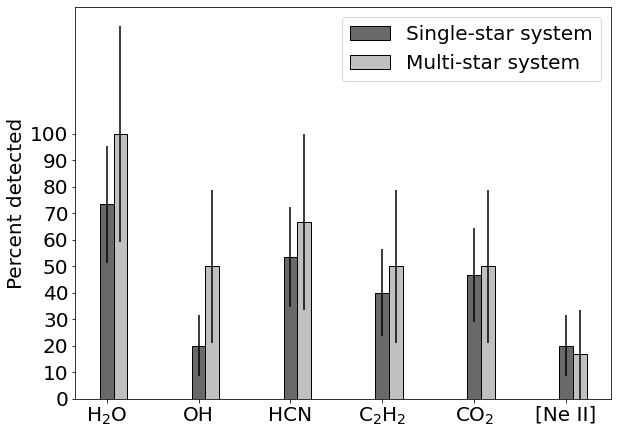

In [11]:
#stacked bar chart part two

#import statement
from matplotlib import ticker

#create blank figure
plt.figure(figsize=(9.6,7.2))

#single star system data
single1= len(water[water['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single2= len(oh[oh['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single3= len(hcn[hcn['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single4= len(c2h2[c2h2['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single5= len(co2[co2['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))
single6= len(neii[neii['Star_system'] == 'Single']) / (len(info_master[info_master['Star_system'] == 'Single']))

#error bars for single data
singleerr1=np.sqrt(single1/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr2=np.sqrt(single2/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr3=np.sqrt(single3/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr4=np.sqrt(single4/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr5=np.sqrt(single5/(len(info_master[info_master['Star_system'] == 'Single'])))
singleerr6=np.sqrt(single6/(len(info_master[info_master['Star_system'] == 'Single'])))

single = 100*np.array((single1,single2,single3,single4,single5,single6))
singleerr= 100*np.array((singleerr1,singleerr2,singleerr3,singleerr4,singleerr5,singleerr6))

#multi star system data
multi1= len(water[water['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi2= len(oh[oh['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi3= len(hcn[hcn['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi4= len(c2h2[c2h2['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi5= len(co2[co2['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))
multi6= len(neii[neii['Star_system'] != 'Single']) / (len(info_master[info_master['Star_system'] != 'Single']))

#error bars for multi data
multierr1=np.sqrt(multi1/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr2=np.sqrt(multi2/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr3=np.sqrt(multi3/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr4=np.sqrt(multi4/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr5=np.sqrt(multi5/(len(info_master[info_master['Star_system'] != 'Single'])))
multierr6=np.sqrt(multi6/(len(info_master[info_master['Star_system'] != 'Single'])))

multi = 100*np.array((multi1,multi2,multi3,multi4,multi5,multi6))
multierr= 100*np.array((multierr1,multierr2,multierr3,multierr4,multierr5,multierr6))

ind = np.arange(6)
width = 0.15 #leave width for now      

p1 = plt.bar(ind, single, width,yerr=singleerr, color='dimgrey',edgecolor='black') 
p2 = plt.bar(ind+width, multi, width,yerr=multierr, color='silver',edgecolor='black')

plt.ylabel('Percent detected',fontsize=20)
plt.xticks(ind, (r'H$_2$O', 'OH', 'HCN', r'C$_2$H$_2$', r'CO$_2$', '[Ne II]'),fontsize=20) #replace tick marks to reflect six molecules
plt.yticks(np.arange(0, 110, 10),fontsize=20)
plt.legend((p1[0], p2[0]), ('Single-star system', 'Multi-star system'),fontsize=20)

plt.show()